# Working with Graphs

Remember, a *graph* is simply a set of vertexes, nodes or points which are connected by edges, arcs or lines. A fundamental requirment for using a graph to solve problems is the capability to search for connections between points on the map. To make sense of a graph, you need to sort the nodes to create a specific organization. By sorting the data, you can view it in the same manner each time the algorithm traverses the nodes. 

A computer doesn't know that it needs to look in a specific place until you tell it to do so. You can focus the computer's attention on a specific location by reducing the graph size. With a simplified problem, the algorithm can more easily find the shortest route between two nodes, but performing this search can be more convoluted then it might appear.

This chapter explores these concepts in greater detail. 

## Traversing a Graph Efficiently

*Traversing a graph* simply means to search (or visit) each vertex (or node) in a specific order. The process of visiting a vertex can include both reading and updating it. As you traverse a graph, an unvisited vertex is *undiscovered*. After a visit, the vertex becomes *discovered*, because you visited it, or *processed*, because the algorithm tried all of the edges departing from it. 

The order of the search determines the kind of search performed, and many algorithms are available to perform this task. Two such algorithms are Breadth-First Search (BFS) and Depth-First Search (DFS), which will be explored below. 

Developers often emply BFS to locate the shortest route between two end points as quickly as possible. This means that you commonly find BFS used in applications such as GPS, where finding the shortest route is paramount. A DFS focuses on finding an entire path before exploring any other path. You use it when you need to search in detail, such as when attempting to solve to a maze. BFS needs a lot of memory because it systematically stores all the paths before finding a solution - DFS needs less memory, but you have no guarantee that it'll find the shortest and most direct solution.

### Considering Redundancy

When working with a graph, the nodes are likely to interconnect such that you might have to traverse some nodes more than once to traverse the entire graph. Because of this, dense graphs can greatly increase both computational and storage requirements. To reduce the negative effects of visiting a node more than once, it's common to mark each visited node in some manner to show that the algorithm has visited it - when the algortihm detects a marked node, it can simply skip that node and move on. Marking visited nodes decreases the performance penalties inherent in redundancy and also enables verification that the search is complete. 

### Creating the Graph

To properly explore the BFS and DFS algorithms, we'll use a common graph for both.

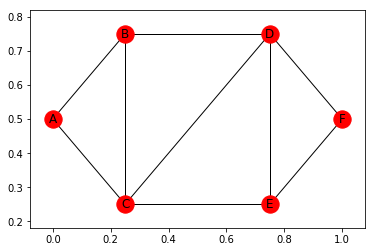

In [112]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter('ignore')

graph = {'A': ['B', 'C'],
         'B': ['A', 'C', 'D'],
         'C': ['A', 'B', 'D', 'E'],
         'D': ['B', 'C', 'E', 'F'],
         'E': ['C', 'D', 'F'],
         'F': ['D', 'E']}

myGraph = nx.Graph()

for node in graph:
    myGraph.add_nodes_from(node)
    for edge in graph[node]:
        myGraph.add_edge(node, edge)
        
pos = {'A': [0.00, 0.50],
       'B': [0.25, 0.75],
       'C': [0.25, 0.25],
       'D': [0.75, 0.75],
       'E': [0.75, 0.25],
       'F': [1.00, 0.50]}

nx.draw_networkx(myGraph, pos)

### Applying Breadth-First Search

A BFS begins at the graph root and explores every node that attaches to the root. It then searches the next level - exploring each level in turn until it reaches the end. BFS explores the graph in a systematic way, exploring vertexes all around the starting vertex in a circular fashion.

The example will also leverage the `deque` data structure from the `collections` package. 

> Deques are a generalization of stacks and queues (the name is pronounced “deck” and is short for “double-ended queue”). Deques support thread-safe, memory efficient appends and pops from either side of the deque with approximately the same O(1) performance in either direction. Though `list` objects support similar operations, they are optimized for fast fixed-length operations and incur O(n) memory movement costs for pop(0) and insert(0, v) operations which change both the size and position of the underlying data representation.

> `Deque` Documentation: https://docs.python.org/2/library/collections.html#collections.deque

In [113]:
from collections import deque

def bfs(graph, start):
    queue = deque(start)
    discovered = deque(start)
    path = deque()
    
    
    while queue:
        print('\nQueue is: {}'.format(queue))
        vertex = queue.popleft()
        print("Exploring {} for undiscovered nodes ...".format(vertex))
        
        for neighbor in graph[vertex]:
            if neighbor not in discovered:
                queue.append(neighbor)
                discovered.append(neighbor)
                path.append(vertex + '>' + neighbor)
                print('Adding {} to the queue.'.format(neighbor))
    
    return path
    
print("\nBFS Traversal Path, Starting at 'A':", bfs(myGraph, 'A'))


Queue is: deque(['A'])
Exploring A for undiscovered nodes ...
Adding B to the queue.
Adding C to the queue.

Queue is: deque(['B', 'C'])
Exploring B for undiscovered nodes ...
Adding D to the queue.

Queue is: deque(['C', 'D'])
Exploring C for undiscovered nodes ...
Adding E to the queue.

Queue is: deque(['D', 'E'])
Exploring D for undiscovered nodes ...
Adding F to the queue.

Queue is: deque(['E', 'F'])
Exploring E for undiscovered nodes ...

Queue is: deque(['F'])
Exploring F for undiscovered nodes ...

BFS Traversal Path, Starting at 'A': deque(['A>B', 'A>C', 'B>D', 'C>E', 'D>F'])


### Applying Depth-First Search

When performing a Depth-First Search (DFS), the algorithm begins at the graph root and then explores every node from that root down a single path to the end. It then backtracks and begins exploring the paths not taken in the current search path until it reaches the root again. At that point, if other paths to take from the root are available, the algorithm chooses one and begins the search again. 

The fundamental difference between implementing a DFS versus BFS is that in DFS, newly discovered nodes are pushed onto a stack to be processed rather than a queue. While the below example uses an iterative approach, the reliance on a stack means that you could also implement this kind of search using recursion. The use of recursion would make the algorithm faster, but would also result in higher memory consumption.

In [114]:
def dfs(graph, start):
    stack = deque(start)
    parents = {start: start}
    path = []
    
    while stack:
        print('\nStack is: {}'.format(stack))
        vertex = stack.pop()
        print("Exploring {} for undiscovered nodes ...".format(vertex))
        
        for neighbor in graph[vertex]:
            if neighbor not in parents:
                parents[neighbor] = vertex
                stack.append(neighbor) 
                print('Adding {} to the stack.'.format(neighbor))
        path.append(parents[vertex] + '>' + vertex)
                
    return path[1:]

print("\nDFS Traversal Path, Starting at 'A':", dfs(myGraph, 'A'))


Stack is: deque(['A'])
Exploring A for undiscovered nodes ...
Adding B to the stack.
Adding C to the stack.

Stack is: deque(['B', 'C'])
Exploring C for undiscovered nodes ...
Adding D to the stack.
Adding E to the stack.

Stack is: deque(['B', 'D', 'E'])
Exploring E for undiscovered nodes ...
Adding F to the stack.

Stack is: deque(['B', 'D', 'F'])
Exploring F for undiscovered nodes ...

Stack is: deque(['B', 'D'])
Exploring D for undiscovered nodes ...

Stack is: deque(['B'])
Exploring B for undiscovered nodes ...

DFS Traversal Path, Starting at 'A': ['A>C', 'C>E', 'E>F', 'C>D', 'A>B']


### Further Exploration of BFS and DFS Using a Tree Graph

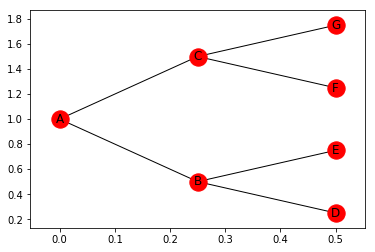

In [115]:
graph2 = {'A': ['B', 'C'],
         'B': ['D', 'E'],
         'C': ['F', 'G']}

newGraph = nx.Graph()

for node in graph2:
    newGraph.add_nodes_from(node)
    for edge in graph2[node]:
        newGraph.add_edge(node, edge)
        
pos2 = {'A': [0.00, 1],
       'B': [0.25, 0.5],
       'C': [0.25, 1.5],
       'D': [0.5, 0.25],
       'E': [0.5, 0.75],
       'F': [.5, 1.25],
       'G': [.5, 1.75]}
        

nx.draw_networkx(newGraph, pos2)

In [117]:
print("\nBFS Traversal Path, Starting at 'A':", bfs(newGraph, 'A'))
print("\n---------------------------------------------------------")
print("\nDFS Traversal Path, Starting at 'A':", dfs(newGraph, 'A'))


Queue is: deque(['A'])
Exploring A for undiscovered nodes ...
Adding B to the queue.
Adding C to the queue.

Queue is: deque(['B', 'C'])
Exploring B for undiscovered nodes ...
Adding D to the queue.
Adding E to the queue.

Queue is: deque(['C', 'D', 'E'])
Exploring C for undiscovered nodes ...
Adding F to the queue.
Adding G to the queue.

Queue is: deque(['D', 'E', 'F', 'G'])
Exploring D for undiscovered nodes ...

Queue is: deque(['E', 'F', 'G'])
Exploring E for undiscovered nodes ...

Queue is: deque(['F', 'G'])
Exploring F for undiscovered nodes ...

Queue is: deque(['G'])
Exploring G for undiscovered nodes ...

BFS Traversal Path, Starting at 'A': deque(['A>B', 'A>C', 'B>D', 'B>E', 'C>F', 'C>G'])

---------------------------------------------------------

Stack is: deque(['A'])
Exploring A for undiscovered nodes ...
Adding B to the stack.
Adding C to the stack.

Stack is: deque(['B', 'C'])
Exploring C for undiscovered nodes ...
Adding F to the stack.
Adding G to the stack.

Stack

## Sorting the Graph Elements

The ability to search graphs efficiently relies on sorting. In a sorted graph, you move from less specific to more specifc when performing the search, which means that you don't revisit the previous levels. The following sections review *Directed Acyclic Graphs* (DAGs), which are finite directed graphs that don't have any loops in them. A *loop* creates a situation in which a set of steps repeats until a condition is met or a certain number of iterations has occured. 

### Directed Acyclic Graphs

This kind of graph has all sorts of practical applications, such as schedules, with each node representing a particular milestone. The basic principles of DAGs are that they:

- Follow a particular order so that you can't get from one vertex to another and back to the beginning vertex using any route
- Provide a specific path from one vertex to another so that you can create a predictable set of routes

You see DAGs used for many organizational needs, such as org charts or some kinds of flow charts. DAGs enable you to create predictable routes, which makes DAGs easier to process than many other kinds of graphs you work with. DAGs can also use optional routes - the point is that you take a specific path, but each path can connect to the next level in several different ways.

#### Relying on Topological Sorting

An important element of DAGs is that you can represent a myriad of activities using them. However, some activities require that you approach tasks in a specific order. This is where topological sorting comes into play. *Topological sorting* orders all the vertexes of a graph on a line with the direct edges pointing from left to right. 

When you use topological sorting, you organize the graph so that every vertex leads to a later vertex in the sequence. Any sort of scheduling that requires you to move from a specific starting point to a specific ending point can rely on a DAG with topological sorting. 

Topological sorting can help you determine that your graph has no cycles - it also proves helpful in algorithms that process complex graphs because it shows the best order for processing them. You can obtain the topological sort by using a DFS algorithm. Simply note the processing order of the vertexes by the algorithm .